In [3]:
import torchvision
import torch
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np

In [21]:
training_dataset_path = '../iais22-birds/birds/birds'
test_dataset_path = ''

In [ ]:
# VIDEO DE EXPLICACION DE LA MEAN Y STD

In [22]:
training_transforms = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

In [23]:
train_dataset = torchvision.datasets.ImageFolder(root = training_dataset_path, transform = training_transforms)

In [25]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=32, shuffle = False)

In [28]:
def get_mean_and_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0
    for images, _ in loader :
        image_count_in_a_batch = images.size(0)
        images = images.view(image_count_in_a_batch, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images_count += image_count_in_a_batch

    mean /= total_images_count
    std /= total_images_count
    
    return mean, std, total_images_count

In [29]:
get_mean_and_std(train_loader)

(tensor([0.4704, 0.4669, 0.3898]), tensor([0.2035, 0.2001, 0.2047]), 58388)

In [ ]:
# VIDEO DE EXPLICACION DE PREPARAR UN DATASET

In [4]:
train_dataset_path = '../iais22-birds/birds/birds'
test_dataset_path = ''

In [5]:
#NORMALIZACIÓN: image = (image - mean) / std

mean = [0.4704, 0.4669, 0.3898]
std = [0.2035, 0.2001, 0.2047]
number_of_images = 58388


train_transforms = transforms.Compose ([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(), #Para que no los datos no estén sesgados, le aplicamos modificaciones
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

#test_transforms = transforms.Compose ( [
#    transforms.Resize((224,224)),
#    transforms.ToTensor,
#    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
#])

In [6]:
train_dataset = torchvision.datasets.ImageFolder(root = train_dataset_path, transform = train_transforms)
#test_dataset = torchvision.datasets.ImageFolder(root = test_dataset_path, transform = test_transforms)

In [7]:
def show_transformed_images(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size = 6, shuffle=True)
    batch = next(iter(loader))
    images, labels = batch
    
    grid = torchvision.utils.make_grid(images, nrow = 3)
    plt.figure(figsize=(11,11))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print('labels: ', labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels:  tensor([222,  11, 118,  58, 198, 312])


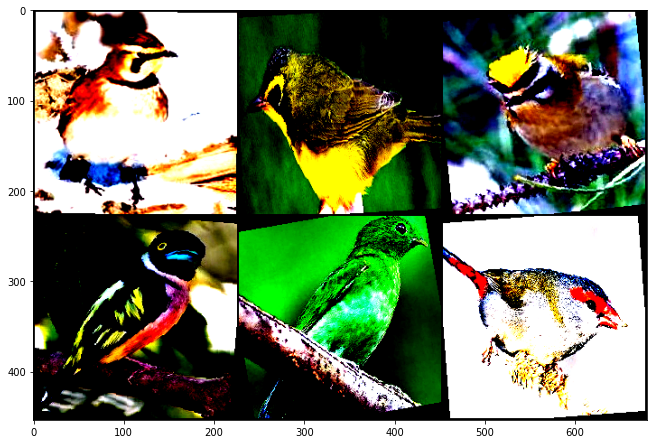

In [8]:
show_transformed_images(train_dataset)